### 1. Define Transition Kernel

In [1]:
trans_ker = function(x,y,z){
  z*dnorm(x,y-1.5,1) + (1-z)*dnorm(x,y+1.5,1)
}

### 2. Define Target Distribution

In [2]:
target_func = function(x){
  1/sqrt(8*x^{2}+1)*exp(-0.5*(x^{2}-8*x-16/(8*x^{2}+1)))
} 

### 3. Determine iteration number

In [3]:
N = 10000
x= rep(0,N)

### 4. Metropolis-Hastings Algorithm

In [4]:
for(i in 1:N){
  
  z1 = rbinom(1,1,0.6)
  z2 = rbinom(1,1,0.6)
  x_dash = z1*rnorm(1,x[i]-1.5,1)+(1-z1)*rnorm(1,x[i]+1.5,1)
  
  alpha = (target_func(x_dash)/trans_ker(x_dash,x[i],z1))/(target_func(x[i])/trans_ker(x[i],x_dash,z2))
  p = min(alpha,1)
  
  x[i+1]=sample(c(x[i],x_dash),size=1,prob=c(1-p,p))
}

### 5. Draw a Density plot of True Posterior distribution 

In [5]:
library(repr)

Warning message:
"package 'repr' was built under R version 3.6.3"

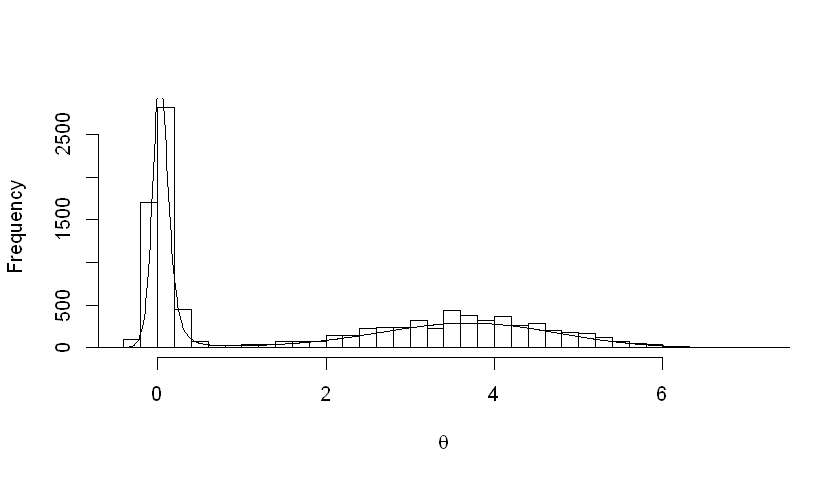

In [6]:
options(repr.plot.width=7, repr.plot.height=4)
hist(x,breaks=50, main = '', xlab = expression(theta))
lines(seq(-2,10,0.01),target_func(seq(-2,10,0.01)),lty=1)